# Fund20. 비지도학습 (Unsupervised Learning)
비지도학습이란 지도학습과 달리 training data로 라벨이 없는 데이터가 주어지는 학습방법을 말한다. 데이터셋의 feature나 패턴을 모델 스스로가 판단한다.  
대표적인 예시로 군집화(클러스터링, clustering), 이 외에도 차원 축소(dimensionality reduction) 및 이를 이용한 데이터 시각화, 생성 모델(generative model) 등 다양한 task를 포괄하는 개념이 비지도학습이다. 

## 클러스터링 (1) K-means

### 1. 데이터 생성
군집화(클러스터링)란 명확한 분류 기준이 없는 상황에서도 데이터들을 분석해 가까운(혹은 유사한) 것들끼리 묶어주는 작업이다.  
K-means 알고리즘은 k 값이 주어졌을 때, 주어진 데이터들을 k개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나다. 

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])  # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


임의로 지정한 k개의 중심점이 새로운 label의 역할을 하는 것이 K-means의 아이디어다. 

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


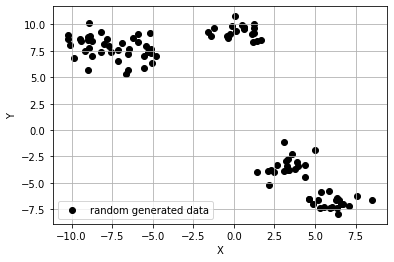

In [2]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 데이터들을 pandas DataFrame 형태로 변한
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름에 라벨 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

좌표축 위에 존재하는 데이터들 사이의 거리는 피타고라스 정리를 응용해 계산할 수 있는데, 두 점 사이의 이 직선거리를 `유클리드 거리(Eucledian distance)` 또는 `L2 distance`라고 부른다. 전체적인 K-mean 알고리즘 순서는 아래와 같다.  
1. 원하는 클러스터의 수(K)를 결정
2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid) 선정
3. 나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리의 중심점의 클러스터에 속하도록 한다. 
4. 각 K개의 클러스터의 중심점을 재조정한다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 된다.
5. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 갖는 클러스터에 해당 점을 재배정
6. 4~5번 반복 수행. 반복의 횟수는 사용자가 적절히 조절, 특정 iteration이 되면 수렴하게 된다. 

### 2. K-means 알고리즘 적용

In [3]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


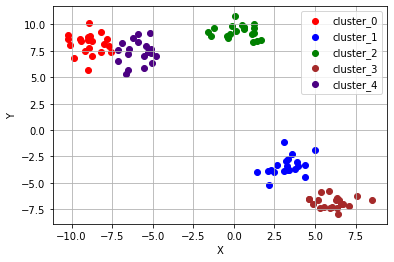

In [4]:
# K-means 결과 시각화
# n번째 클러스터 데이터를 어떤 색으로 도식할지 결정하는 color dict
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'brown', 4: 'indigo'}

# 점 데이터를 X-Y 그리드에 시각화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분해 점에 색칠해 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot.

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 3. K-means 알고리즘이 잘 동작하지 않는 예

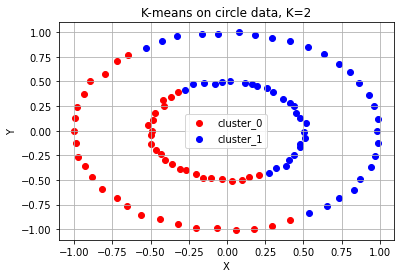

In [5]:
# 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}

for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

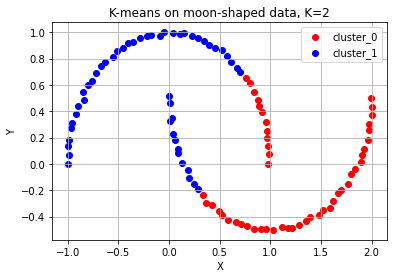

In [6]:
# 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01)

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

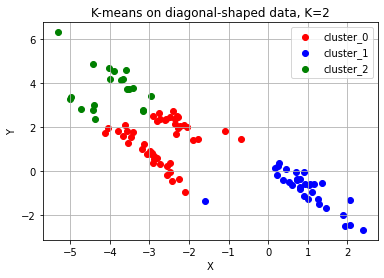

In [7]:
# 대각선 모양 분포
from sklearn.datasets import make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]] # 대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation)

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

- 군집의 개수(K)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용하기 어렵다. 
- 유클리드 거리가 가까운 데이터끼리 군집이 형성되기 때문에 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화가 어렵다.

## 클러스터링 (2) DBSCAN
DBSCAN(Density Based Spatial Clustering of Applications with Noises) 알고리즘은 가장 널리 알려진 밀도 기반의 군집 알고리즘이다.  
K-means 알고리즘으로 해결하기 어려웠던 문제들을 이를 활용해 해결할 수 있다. DBSCAN 알고리즘의 가장 큰 특징 중 하나는 군집의 개수를 미리 지정할 필요가 없다는 것이다. 또한, 유클리드 거리 기반의 방식과 달리 조밀하게 몰려 있는 클러스터를 군집화하는 방식이기 때문에 원 모양의 군집이 아닌 불특정한 형태의 군집도 찾을 수 있다.  

### 1. DBSCAN 알고리즘 동작
- epsilon : 클러스터의 반경
- minPts : 클러스터를 이루는 개체의 최소값
- core point : 반경 epsilon 내에 minPts개 이상의 점이 존재하는 중심점
- border point : 군집의 중심은 아니지만, 군집에 속하는 점
- noise point : 군집에 포함되지 못하는 점  
DBSCAN에서는 epsilon과 minPts 값을 미리 지정해줘야 한다. 
1. 임의의 점 p를 설정해 p를 포함해 주어진 클러스터의 반경(epsilon) 안에 포함되어 있는 점들이 개수를 센다.
2. 만일 해당 원에 minPts개 이상의 점이 포함되어 있으면, 점 p를 core point로 간주하고 원에 포함된 점들을 클러스터로 묶는다.
3. 해당 원에 minPts개 미만의 점이 포함되어 있으면, 일단 pass
4. 모든 점들에 대해 돌아가면서 1~3번 과정 반복, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터에 속한다면, 두 개의 클러스터는 연결되어 있다고 하며 하나의 클러스터로 묶어준다. 
5. 모든 점에 대해 클러스터링을 끝냈는데, 어떤 클러스터에도 속하지 못하는 점이 있다면 noise point로 간주한다. 또한 특정 클러스터에 속해도 core point가 아닌 점들을 border point라고 한다.

### 2. DBSCAN 알고리즘 적용

# of cluster: 2
DBSCAN Y-hat: [0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1]


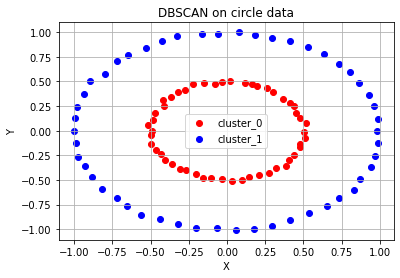

In [8]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'}

# 원형 분포
epsilon, minPts = 0.2, 3
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
circle_dbscan.fit(circle_points) # 3~5 과정 반복
n_cluster = max(circle_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1]


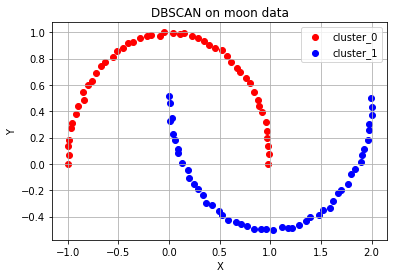

In [9]:
# 달 모양 분포
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'}

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


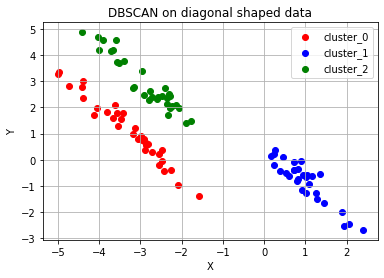

In [10]:
# 대각선 모양 분포
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

DBSCAN `Y-hat` 결가ㅗ가 -1인 경우는 어느 군집에도 포함되지 못한 noise point가 존재한다는 것이다.  
epsilon과 minPts 값을 잘 조절해주면 클러스터 수를 명시해주지 않아도 적절한 클러스터으 개수를 설정해 주어진 데이터에 대한 군집화가 가능하다.

### 3. DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.09395s / DBSCAN: 0.00097s
# of samples: 500 / Elapsed time of K-means: 0.01228s / DBSCAN: 0.00275s
# of samples: 1000 / Elapsed time of K-means: 0.01572s / DBSCAN: 0.00577s
# of samples: 2000 / Elapsed time of K-means: 0.01904s / DBSCAN: 0.01436s
# of samples: 5000 / Elapsed time of K-means: 1.16085s / DBSCAN: 0.08502s
# of samples: 7500 / Elapsed time of K-means: 1.00992s / DBSCAN: 0.13013s
# of samples: 10000 / Elapsed time of K-means: 0.95771s / DBSCAN: 0.19067s
# of samples: 20000 / Elapsed time of K-means: 1.06779s / DBSCAN: 0.45949s
# of samples: 30000 / Elapsed time of K-means: 0.88253s / DBSCAN: 0.84544s
# of samples: 40000 / Elapsed time of K-means: 0.90587s / DBSCAN: 1.38999s
# of samples: 50000 / Elapsed time of K-means: 1.22391s / DBSCAN: 2.10188s


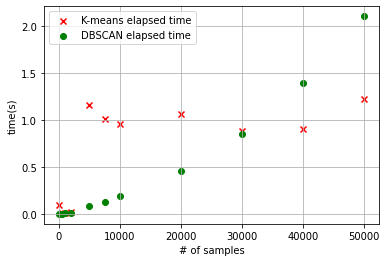

In [11]:
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성
    
    # K-means 시간 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()
    
    # DBSCAN 시간 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()
    
    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))
    
# K-means / DBSCAN 소요 시간 시각화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

데이터의 수가 적을 때는 DBSCAN 알고리즘의 수행 시간이 더 짧았지만, 데이터의 수가 많아질수록 수행시간이 급격히 늘어난다.  
또한 클러스터의 수를 지정해줄 필요가 없으나 데이터 분포에 맞는 epsilon과 minPts의 값을 지정해주어야 한다는 점이 단점으로 보인다.

## 차원 축소 (1) PCA
비지도학습의 대표적인 방법 중 하나로 주성분분석(PCA)이라는 차원 축소 알고리즘이 있다. 차원 축소는 수많은 정보 속에서 더 중요한 요소가 무엇인지를 알게 해주는 방법으로, 특히 비지도학습에서는 데이터를 나타내는 여러 feature들 중에서 어떤 feature가 그 데이터를 가장 잘 represent하는지 알게 해주는 feature extraction의 용도로 사용된다. 
> PCA는 데이터 분포의 주성분을 찾아주는 방법이다. 주성분의 의미는 데이터의 분산이 가장 큰 방향 벡터를 말한다.  
PCA는 데이터들의 분산을 최대로 보존하면서, 서로 직교하는 기저(basis, 큰 방향벡터의 축)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)한다.  
또한 PCA에서는 기존 feature 중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형결합하는 방식을 사용한다.

### 1. 데이터 개요

In [12]:
# 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer()

# y = 0(Malignant : 악성), y = 1(Benign : 양성)
cancer_X, cancer_y = cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10)
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2. 유방암 데이터셋에 PCA 알고리즘 적용

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dict
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

# train data에 PCA 적용
train_X_ = StandardScaler().fit_transform(train_X)  # 불러온 데이터에 대한 정규화 (각 컬럼의 range of value가 전부 다르기 때문에)
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2)  # 주성분의 개수 2개, 즉 기저가 되는 방향벡터를 2개
pc = pca.fit_transform(train_df)

In [14]:
# test data에 PCA 적용
test_X_ = StandardScaler().fit_transform(test_X)  # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [15]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax):
    h = .02 # step size in the mash
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')
    
# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아두자.
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

여기서는 서포트 벡터 머신 분류기(SVM Classifier)를 훈련시킨다. SVM classifier는 주성분(PC)를 기반으로 해당 점이 양성인지 악성인지를 구분해 주는 decision boundary에 해당하는데, train data에 맞게 경계선이 그어질 수 있도록 훈련시키는 단계에 해당한다. 

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


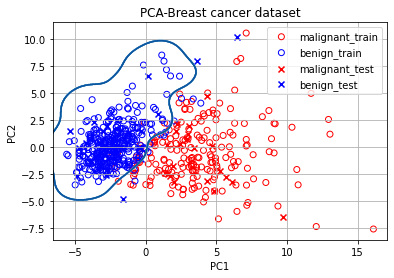

In [16]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

단 2개의 주성분 feature만으로 분류한 PCA classifier의 정확도가 30개의 feature를 모두 사용한 original classifier보다 훨씬 높은 분류 정확도를 보여준다. 그 이유는 제공된 30개의 feature 중 종양의 악성/양성 여부와 관련 없는 것이 존재해서 해당 feature가 오히려 분류를 방해했기 때문이다.   
이렇듯 PCA는 각 feature간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도학습 방법 중 하나다.

## 차원 축소 (2) T-SNE
T-SNE(T-Stochastic Neighbor Embedding)는, 시각화에 많이 쓰이는 알고리즘이다.  
PCA는 주로 선형적인 데이터의 분포(키, 몸무게 등)를 가질 때 정보가 가장 잘 보존된다.  

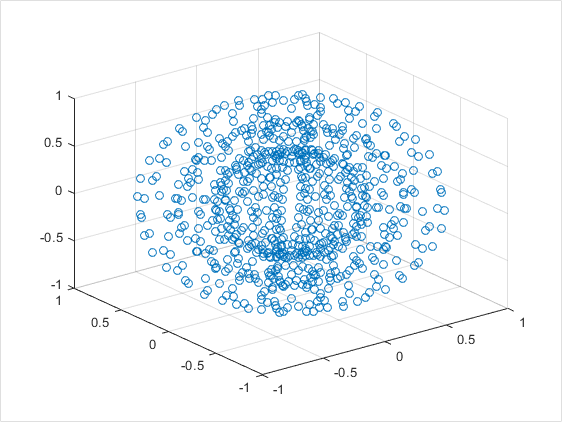  


위의 이미지처럼 방사형적, 비선형적 데이터에서는 많은 정보량을 담기 위한 주성분으로 잡을 선형적인 축을 찾기 어렵다. 따라서, 위 데이터를 PCA를 이용해 2차원으로 표현한다면, 멀리 있는 데이터가 가까이 있도록 차원 축소가 이루어질 것이다.  
T-SNE는 **기존 차원의 공간에서 가까운 점들은, 차원 축소된 공간에서도 여전히 가깝게 유지**되는 것을 목표로 한다. 즉, PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는데 주력하지만, T-SNE는 그보다는 데이터들 간의 상대적 거리를 보존하는데 주력한다. 

### 1. MNIST 데이터셋 로드

In [17]:
from sklearn.datasets import fetch_openml

# 784 pixel로 이루어진 mnist 이미지 데이터 호출
mnist = fetch_openml("mnist_784", version=1)

X = mnist.data / 255.0
y = mnist.target
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

X shape:  (70000, 784)
Y shape:  (70000,)


In [18]:
n_image = X.shape[0]
n_image_pixel = X.shape[1]

pixel_columns = [ f"pixel{i}" for i in range(1, n_image_pixel + 1) ] #  픽셀정보가 있는 칼럼의 이름을 담은 목록
len(pixel_columns)

784

In [19]:
import pandas as pd

df = pd.DataFrame(X, columns=pixel_columns)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i)) # 숫자 라벨을 str로 변환
X, y = None, None

In [20]:
# 7만 개 이미지 데이터 중 1만 개 랜덤샘플링
import numpy as np

# 결과가 재생산 가능하도록 랜덤 seed 설정
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담는다.
rdnperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 1만 개를 뽑고, df_subset에 담는다.
n_image_sample = 10000
random_idx = rdnperm[:n_image_sample]
df_subset = df.loc[rdnperm[:n_image_sample],:].copy()
df_subset.shape

(10000, 786)

<Figure size 432x288 with 0 Axes>

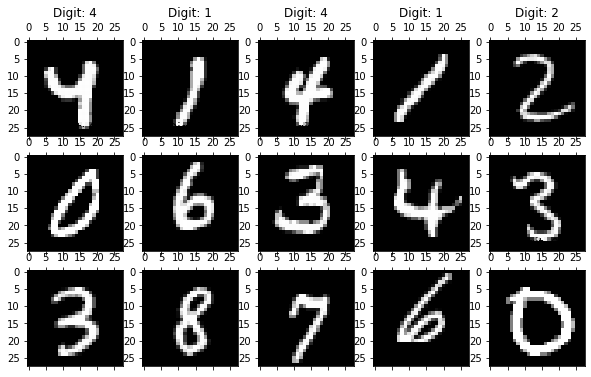

In [21]:
# pandas DataFrame에 올린 데이터셋을 matplotlib을 확인
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure(figsize=(10, 6))
n_img_sample = 15
width, height = 28, 28

# 15개 샘플 시각화
for i in range(0, n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3, 5, i+1, title = f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns].values.reshape((width, height)).astype(float))
    
plt.show()

### 2. PCA를 이용한 MNIST 차원 축소

In [22]:
from sklearn.decomposition import PCA

print("df_subset의 shape: {}".format(df_subset.shape))

n_dimension = 2  # 축소시킬 목표 차원의 수
pca = PCA(n_components = n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values)
df_subset['pca-one'] = pca_result[:, 0]  # 축소한 결과의 첫 번째 차원의 값
df_subset['pca-two'] = pca_result[:, 1]  # 축소한 결과의 두 번째 차원의 값

print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


- 차원을 축소한 대가로 차원의 정보량 중 일부만 남게 된다. 
- sklearn의 PCA 모듈은 PC 축마다 보존하는 정보량의 비율을 제시한다. 

In [23]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


- 784차원을 2차원으로 축소했을 때, 정보량이 전체의 16.9%가 남게 된다.

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

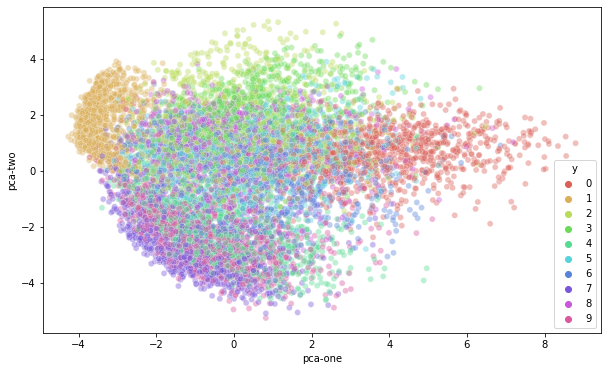

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.4
)

- 같거나 모양이 비슷한 숫자 이미지가 유사한 벡터값을 갖는 것을 색상으로 확인할 수 있다. 

### 3. T-SNE를 이용한 MNIST 차원 축소

In [25]:
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components = n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_result의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)


/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne_result의 shape: (10000, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

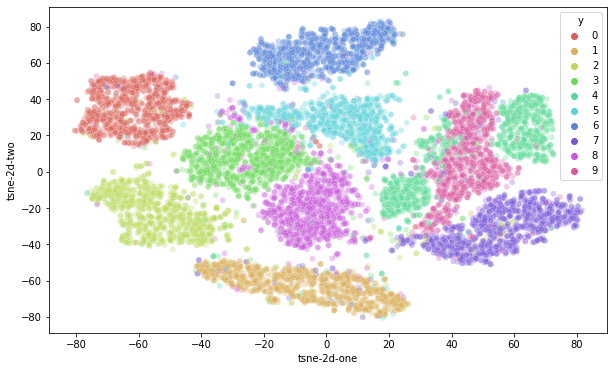

In [26]:
# tsne 결과를 차원별로 추가
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

이것은 PCA와 구별되는 T-SNE의 뚜렷한 특징이다. PCA를 통해 차원축소를 하면서 발생하는 정보 손실의 과정 중에는 두 점 사이의 거리라는 중요한 정보가 함께 손실되는 측면이 있다. 그 결과로 PCA이 시각화를 보면 다른 숫자들 사이의 경계가 불분명할 정도로 분포가 뒤섞여 있는 것을 확인할 수 있다.  
반면, T-SNE에서는 고차원에서 먼 거리의 두 점은 저차원에서도 먼 거리에 있어야 한다. 결과적으로 T-SNE를 시각화하면 숫자들 사이의 경계가 뚜력이 나타나는 장점이 있다. T-SNE는 분류기의 Feature Extractor 모델이 카테고리 간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로 자주 쓰인다.  
> 하지만 T-SNE의 두 차원은 물리적 의미를 갖지 않는다. PCA는 정보 손실을 최소화하려는 관점이기에, 추출된 PC축은 주성분이라는 물리적 의미를 유지하고 있으며, 공분산을 통해 원본 데이터를 일정 부분 복원할 수 있는 가능성을 갖고 있다. 그러나 T-SNE는 정보 손실량에 주목하지 않기에 오직 시각화에만 유리하다.



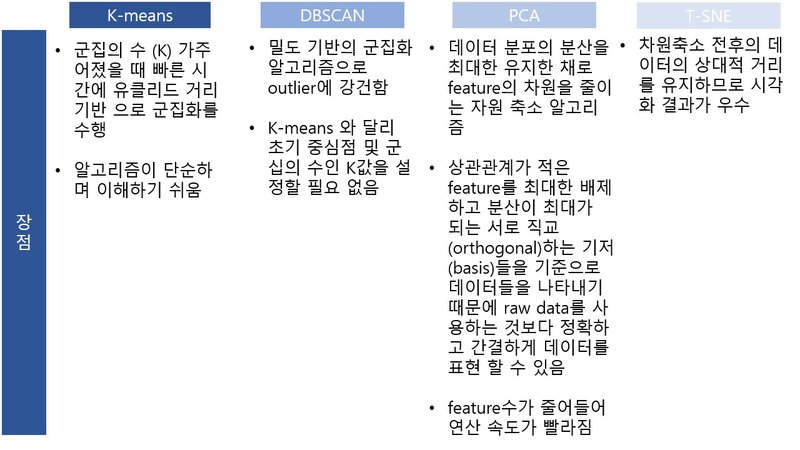

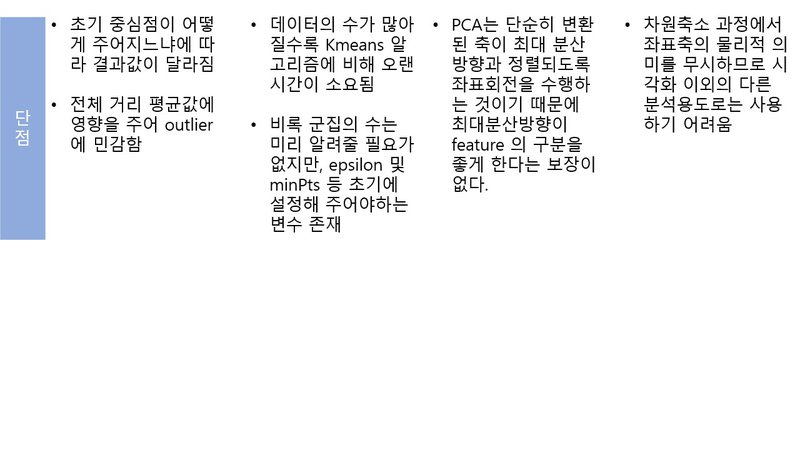